<a href="https://colab.research.google.com/github/Samoh63/Machine-Learning/blob/main/ARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import timedelta
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
def parser(s):
    return datetime.strptime(s, '%Y')

Text(0, 0.5, 'Primary energy consumption (TWh)')

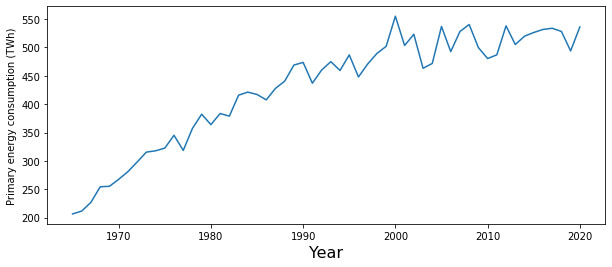

In [ ]:
erergy_consumption = pd.read_csv("Data\primary-energy-cons.csv", parse_dates=[2], index_col=2, date_parser=parser)
norway_erergy_consumption = erergy_consumption[erergy_consumption['Entity'] == 'Norway']
# print("Number of samples:", len(norway_erergy_consumption))
# X = norway_erergy_consumption['Year']
y = norway_erergy_consumption['Primary energy consumption (TWh)']
plt.figure(figsize=(10, 4))
plt.plot(y)
plt.xlabel('Year', fontsize=16)
plt.ylabel('Primary energy consumption (TWh)', fontsize=10)

# Make the Data stationary

Text(0, 0.5, 'diff')

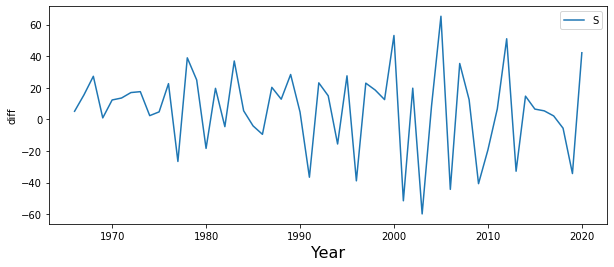

In [ ]:
first_diff = y.diff()[1:]
plt.figure(figsize=(10, 4))
plt.plot(first_diff)
plt.legend('Stationary Data')
plt.xlabel('Year', fontsize=16)
plt.ylabel('diff', fontsize=10)


# ACF & PCAF

c:\Users\Amin\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


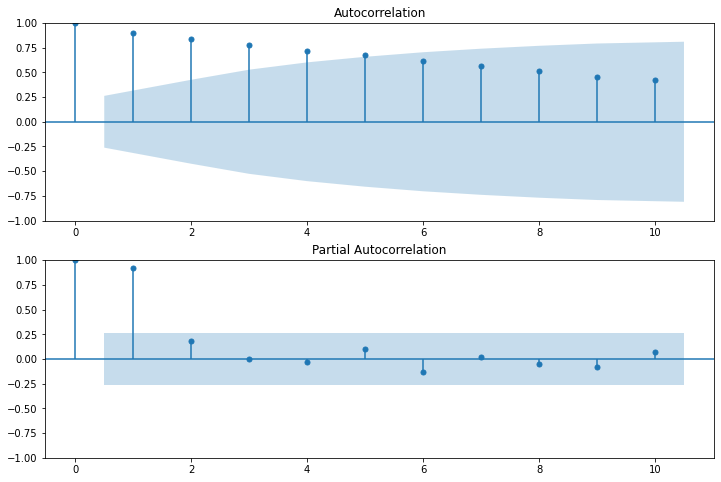

In [ ]:
num_lags = 10
fig = plt.figure(figsize=(12, 8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(y.values.squeeze(), lags=num_lags, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(y, lags=num_lags, ax=ax2)

# acf_vals = acf(first_diff)
# plt.bar(range(num_lags), acf_vals[:num_lags])


## Based on PACF, we should start with a AR(4) process

# Get training and testing sets

In [ ]:
train_end = 50
# test_end = datetime(2020)

train_data = first_diff[:train_end]
test_data = first_diff[train_end:]
test_data


Year
2016-01-01     5.370
2017-01-01     2.155
2018-01-01    -5.607
2019-01-01   -34.316
2020-01-01    42.145
Name: Primary energy consumption (TWh), dtype: float64

# Fit the ARMA Model

In [ ]:
# define model
arma_model = ARIMA(train_data, order=(2,1,6)).fit()
print(arma_model.summary())


c:\Users\Amin\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
c:\Users\Amin\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
c:\Users\Amin\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
c:\Users\Amin\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                                      SARIMAX Results                                       
Dep. Variable:     Primary energy consumption (TWh)   No. Observations:                   50
Model:                               ARIMA(2, 1, 6)   Log Likelihood                -216.181
Date:                              Sun, 22 May 2022   AIC                            450.362
Time:                                      11:25:45   BIC                            467.388
Sample:                                  01-01-1966   HQIC                           456.822
                                       - 01-01-2015                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.6808      0.139    -12.068      0.000      -1.954      -1.408
ar.L2         -0.93

c:\Users\Amin\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Text(0, 0.5, 'Sales')

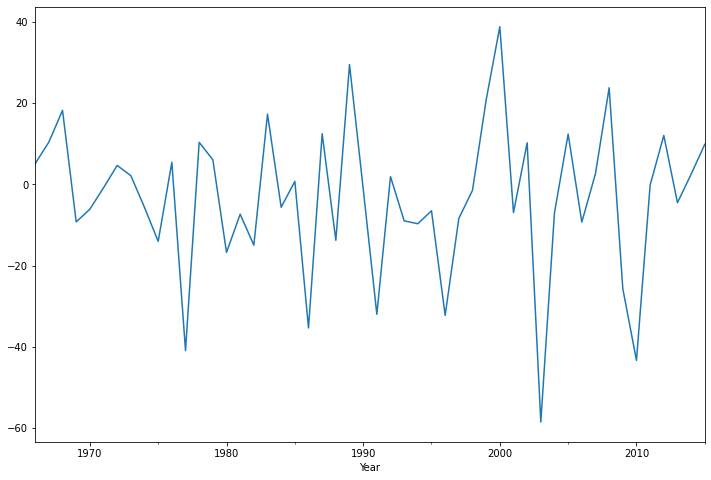

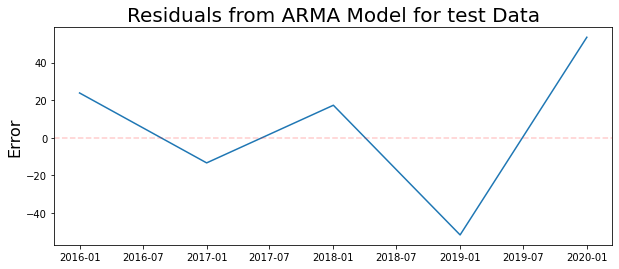

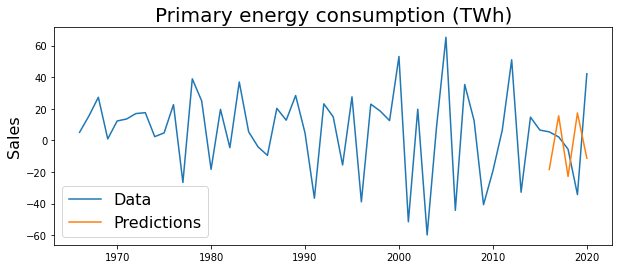

In [ ]:
#plot Residuals of Test Data
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111)
ax = arma_model.resid.plot(ax=ax)
# ax.title('Residuals from ARMA Model for Train Data')


#get prediction start and end dates
pred_start_date = test_data.index[0]
pred_end_date = test_data.index[-1]

#get the predictions and residuals
predictions = arma_model.predict(start=pred_start_date, end=pred_end_date)
residuals = test_data - predictions

# Plot Residuals of Test Data
plt.figure(figsize=(10, 4))
plt.plot(residuals)
plt.title('Residuals from ARMA Model for test Data', fontsize=20)
plt.ylabel('Error', fontsize=16)
plt.axhline(0, color='r', linestyle='--', alpha=0.2)

# plot Data and prediction
plt.figure(figsize=(10, 4))
plt.plot(first_diff)
plt.plot(predictions)
plt.legend(('Data', 'Predictions'), fontsize=16)
plt.title('Primary energy consumption (TWh)', fontsize=20)
plt.ylabel('Sales', fontsize=16)


In [ ]:
# test_data 
# predictions
# y_test = pd.Series([])
# for i in np.arange(0, len(test_data)):
#     y_test[i].append(test_data[i])


# print(first_diff[43:47])
# print(y[43:47])
# print(train_data[44])
# print(first_diff[43:48])
data_predict = pd.DataFrame(test_data)
data_predict['predict'] = 0.0
data_predict['predict'][0] = predictions[0] + y[train_end-1]
# norway_erergy_consumption['Primary energy consumption (TWh)'][0]
for i in np.arange(1, len(data_predict)):
    data_predict['predict'][i] = predictions[i] + data_predict['predict'][i-1]
    
# predictions


Text(0, 0.5, 'Primary energy consumption (TWh)')

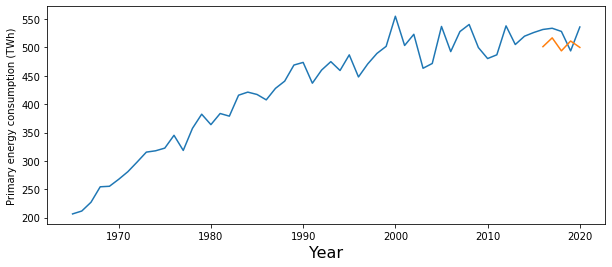

In [ ]:
plt.figure(figsize=(10, 4))
plt.plot(y)
plt.plot(data_predict['predict'])
plt.xlabel('Year', fontsize=16)
plt.ylabel('Primary energy consumption (TWh)', fontsize=10)


# Rolling Forcast Origin

## Idea: Predict one month in advance each time
### Train on months 1, 2, ..., k-3 ---> predict month k-2
### Train on months 1, 2, ..., k-3, k-2 ---> predict month k-1
### Train on months 1, 2, ..., k-3, k-2, k-1 ---> predict month k


# SARIMA Method

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import timedelta
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pandas.plotting import register_matplotlib_converters
from time import time



In [ ]:
def parser(s):
    return datetime.strptime(s, "%Y%m")


erergy_consumption = pd.read_csv("Data\MER_T02_02.csv", parse_dates=[0], index_col=0, date_parser=parser)


In [ ]:
start_date = datetime(2000, 1,1)
end_date = datetime(2021, 1,1)
lim_erergy_consumption = erergy_consumption[start_date:end_date]
lim_erergy_consumption.tail()


,Value
YYYYMM,
2020-09-01,1419.171
2020-10-01,1372.201
2020-11-01,1567.707
2020-12-01,2274.277
2021-01-01,2451.101


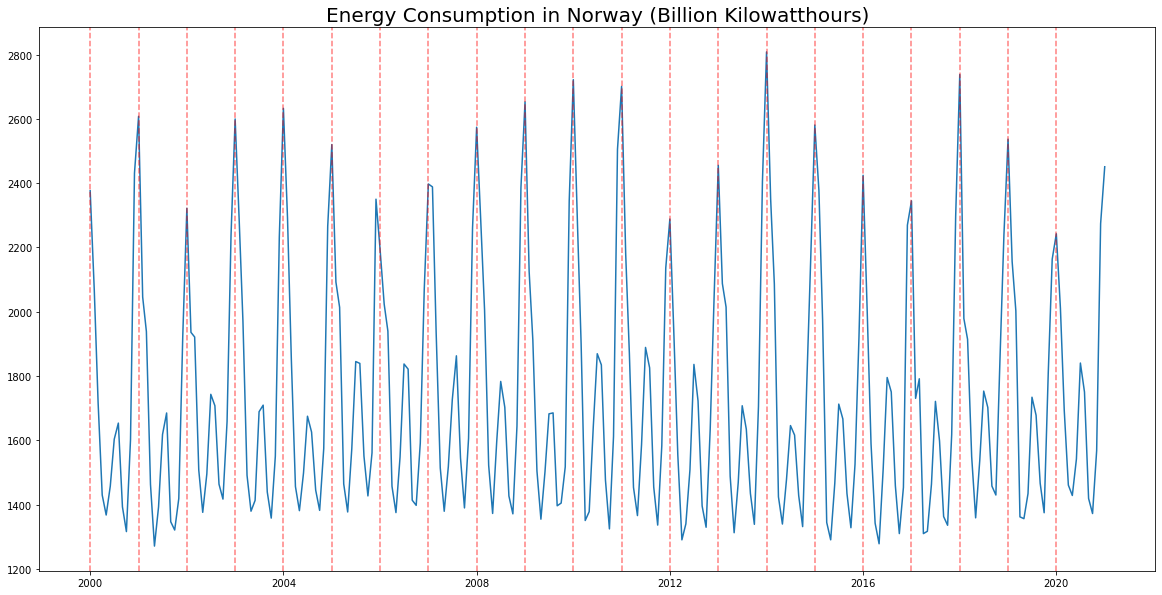

In [ ]:

plt.figure(figsize=(20, 10))
plt.plot(lim_erergy_consumption)
plt.title('Energy Consumption in Norway (Billion Kilowatthours)', fontsize=20)
# plt.ylabel('Energy Consumption', fontsize=16)
for year in range(start_date.year, end_date.year):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'),
                color='r', linestyle='--', alpha=0.5)


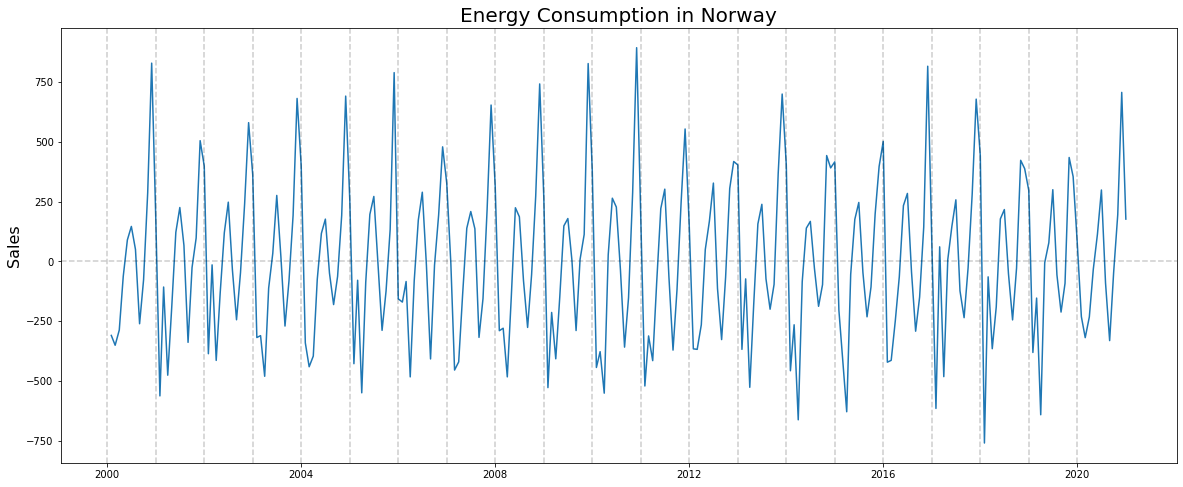

In [ ]:
first_diff = lim_erergy_consumption.diff()[1:]
plt.figure(figsize=(20, 8))
plt.plot(first_diff)
plt.title('Energy Consumption in Norway', fontsize=20)
plt.ylabel('Sales', fontsize=16)
for year in range(start_date.year, end_date.year):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'),
                color='k', linestyle='--', alpha=0.2)
plt.axhline(0, color='k', linestyle='--', alpha=0.2)


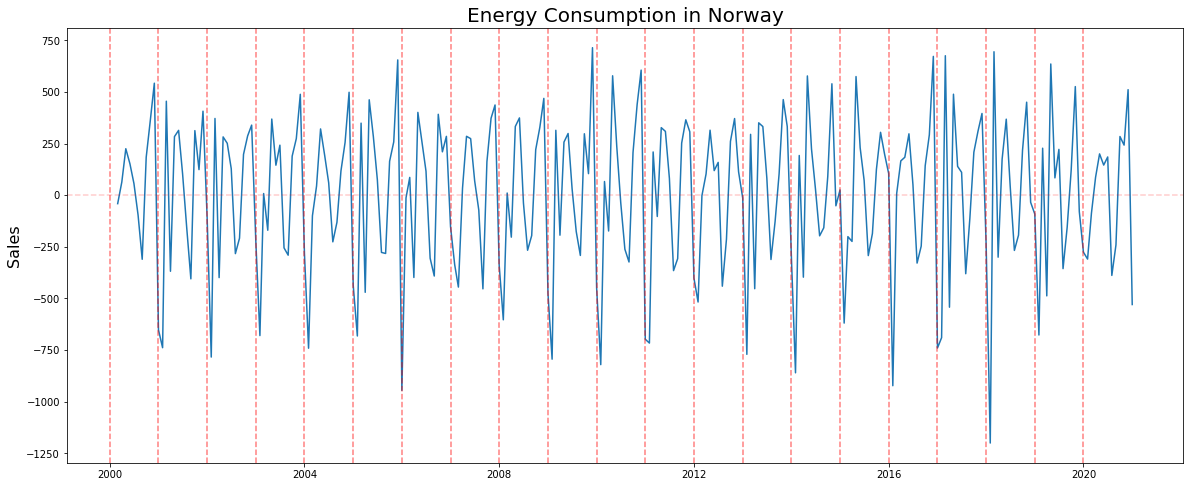

In [ ]:
second_diff = first_diff.diff()[1:]
plt.figure(figsize=(20, 8))
plt.plot(second_diff)
plt.title('Energy Consumption in Norway', fontsize=20)
plt.ylabel('Sales', fontsize=16)
for year in range(start_date.year, end_date.year):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'),
                color='r', linestyle='--', alpha=0.5)
plt.axhline(0, color='r', linestyle='--', alpha=0.2)


# ACF

Text(0, 0.5, 'ACF')

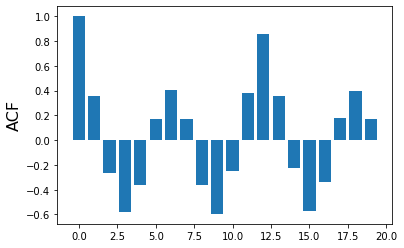

In [ ]:
acf_vals = acf(first_diff)
num_lags = 20
plt.bar(range(num_lags), acf_vals[:num_lags])
# plt.title('ACF', fontsize=20)
plt.ylabel('ACF', fontsize=16)


c:\Users\Amin\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


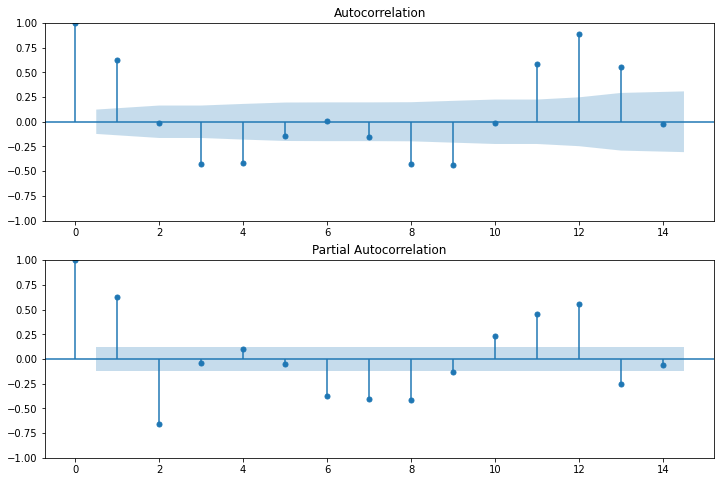

In [ ]:
num_lags = 14
fig = plt.figure(figsize=(12, 8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(lim_erergy_consumption, lags=num_lags, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(lim_erergy_consumption, lags=num_lags, ax=ax2)


### Based on ACF, we should start with a seasonal MA process

# PACF

<BarContainer object of 15 artists>

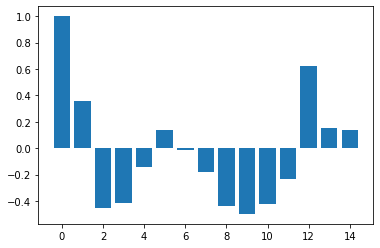

In [ ]:
pacf_vals = pacf(first_diff)
num_lags = 15
plt.bar(range(num_lags), pacf_vals[:num_lags])


### Based on PACF, we should start with a seasonal AR process
### Fit the Model
##### 1) Get training and testing sets

In [ ]:
train_end = datetime(2020, 1, 1)
test_end = datetime(2021, 12, 1)

train_data = erergy_consumption[:train_end]
test_data = erergy_consumption[train_end + timedelta(days=1):test_end]


#### 2) Fit the SARIMA Model

In [ ]:
my_order = (0, 0, 0)
my_seasonal_order = (2, 1, 1, 12)
# define model
model = SARIMAX(train_data, order=my_order, seasonal_order=my_seasonal_order)

#fit the model
start = time()
model_fit = model.fit()
end = time()
print('Model Fitting Time:', end - start)


c:\Users\Amin\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Amin\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Model Fitting Time: 1.7892193794250488


In [ ]:
#summary of the model
print(model_fit.summary())


                                 SARIMAX Results                                  
Dep. Variable:                      Value   No. Observations:                  565
Model:             SARIMAX(2, 1, [1], 12)   Log Likelihood               -3371.901
Date:                    Sun, 22 May 2022   AIC                           6751.803
Time:                            11:25:51   BIC                           6769.064
Sample:                        01-01-1973   HQIC                          6758.546
                             - 01-01-2020                                         
Covariance Type:                      opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -0.0819      0.071     -1.154      0.248      -0.221       0.057
ar.S.L24      -0.2401      0.046     -5.179      0.000      -0.331      -0.149
ma.S.L12      -0.442

#### 3) get the predictions and residuals


Text(0, 0.5, 'Error')

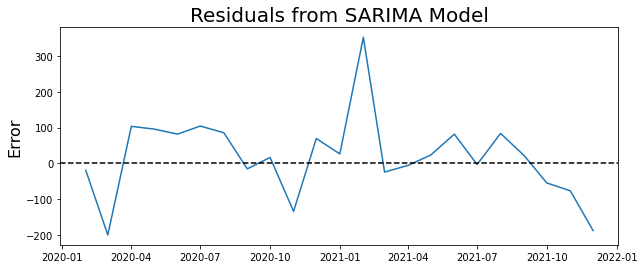

In [ ]:
#get the predictions and residuals
predictions = model_fit.forecast(len(test_data))
predictions = pd.DataFrame(predictions, index=test_data.index)
residuals = test_data['Value'] - predictions['predicted_mean']


plt.figure(figsize=(10, 4))
plt.plot(residuals)
plt.axhline(0, linestyle='--', color='k')
plt.title('Residuals from SARIMA Model', fontsize=20)
plt.ylabel('Error', fontsize=16)


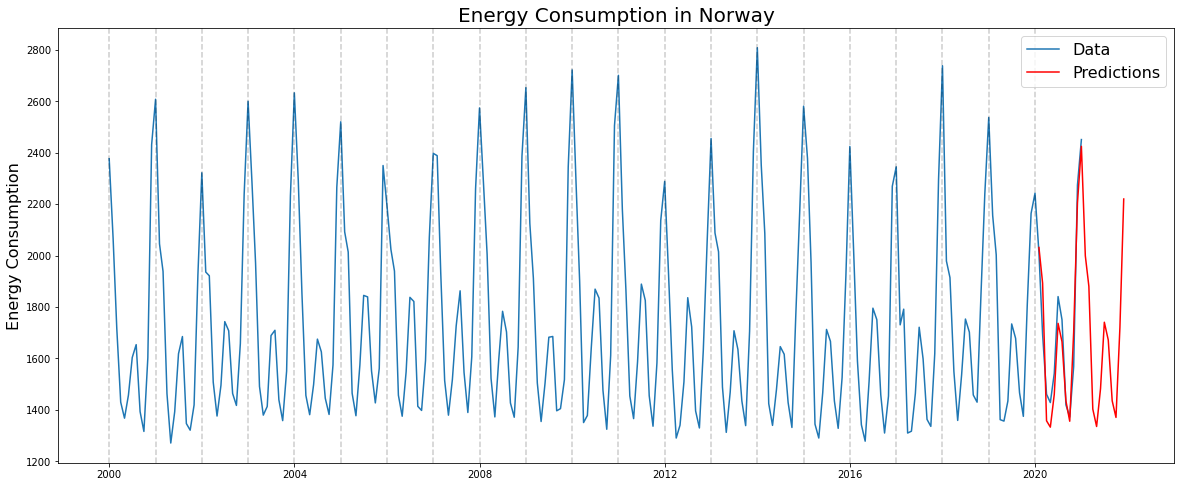

In [ ]:
plt.figure(figsize=(20, 8))

plt.plot(lim_erergy_consumption)
plt.plot(predictions, color = 'red')

plt.legend(('Data', 'Predictions'), fontsize=16)

plt.title('Energy Consumption in Norway', fontsize=20)
plt.ylabel('Energy Consumption', fontsize=16)
for year in range(start_date.year, end_date.year):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'),
                color='k', linestyle='--', alpha=0.2)


In [ ]:
df = lim_erergy_consumption
df['prediction']=predictions
df.to_csv('prediction.csv', index=False)


C:\Users\Amin\AppData\Local\Temp\ipykernel_13860\3581053326.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['prediction']=predictions


In [ ]:
print('Mean Absolute Percent Error:', round(np.mean(abs(residuals/test_data['Value'])),4))
print('Root Mean Squared Error:', np.sqrt(np.mean(residuals**2)))


Mean Absolute Percent Error: 0.0458
Root Mean Squared Error: 112.69555398481997


# Using the Rolling Forecast Origin

In [ ]:
rolling_predictions = test_data.copy()
# print(rolling_predictions)
for train_end in test_data.index:
    train_data = lim_erergy_consumption[:train_end-timedelta(days=1)]
    model = SARIMAX(train_data, order=my_order,
                    seasonal_order=my_seasonal_order)
    model_fit = model.fit()

    pred = model_fit.forecast()
    rolling_predictions['Value'][train_end] = pred


c:\Users\Amin\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Amin\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Amin\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Amin\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Amin\AppData\Local\Programs\Python\Python310\lib\si

Text(0, 0.5, 'Error')

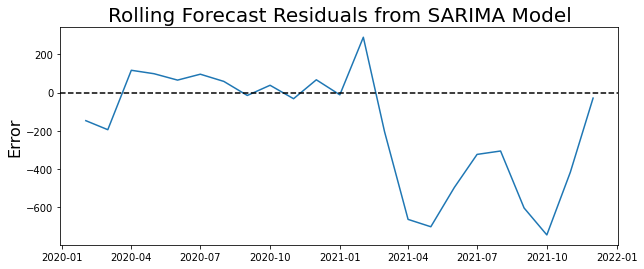

In [ ]:
rolling_residuals = test_data - rolling_predictions
plt.figure(figsize=(10, 4))
plt.plot(rolling_residuals)
plt.axhline(0, linestyle='--', color='k')
plt.title('Rolling Forecast Residuals from SARIMA Model', fontsize=20)
plt.ylabel('Error', fontsize=16)


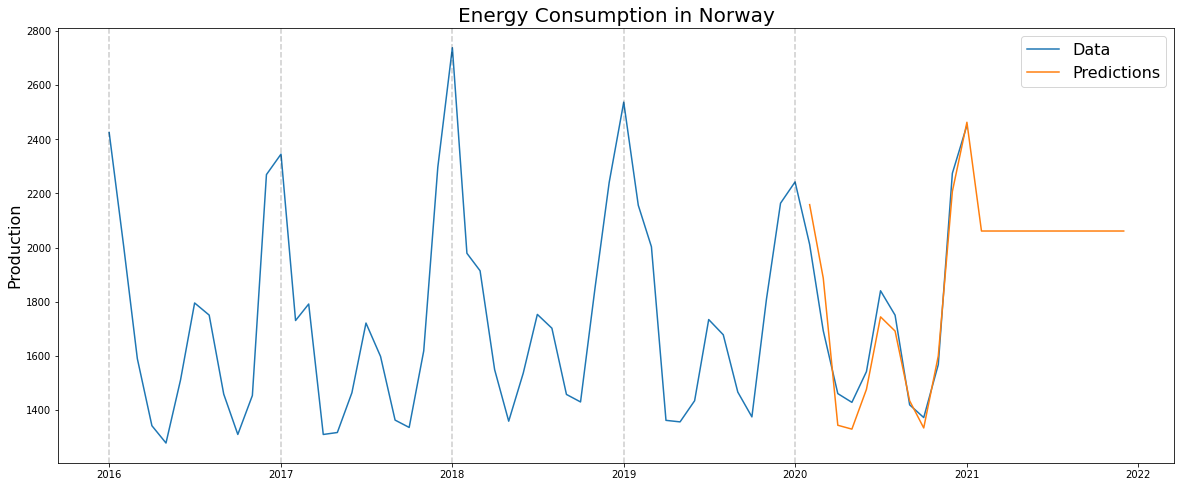

In [ ]:
plt.figure(figsize=(20, 8))

start_date_plot = datetime(2016, 1, 1)
plot_erergy_consumption = erergy_consumption[start_date_plot:end_date]
plt.plot(plot_erergy_consumption)
plt.plot(rolling_predictions)

plt.legend(('Data', 'Predictions'), fontsize=16)


plt.title('Energy Consumption in Norway', fontsize=20)
plt.ylabel('Production', fontsize=16)
for year in range(start_date_plot.year, end_date.year):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'),
                color='k', linestyle='--', alpha=0.2)
